# Model Evaluation 1
Analyze data : bankloan.csv
default as Target
Random state 2020, data splitting 80:20 stratified
1. Modeling compute accuracy, recall, and another metrics using Stratified CV 5 fold:
    - Logistic Regression (solver liblinear)
    - KNN (k = 5)
    - Decision Tree (criterion entropy, max_depth 5)
2. Compute recall, precision, f1 score and make ROC, PRC from logistic regression in test
3. Simple hyperparameter tuning: (optimize C) optimized by f1 and using training 60%, validation 20%, test 20%
4. Compare the result (before and after)
5. Grid Search CV hyperparameter tuning: (optimize C and max_iter) optimized by tf1 and using stratified CV 5 fold
6. Compare the result (before and after)

> ## Library and Data

In [1]:
# dataframe
import pandas as pd
import numpy as np

# model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# result visualization
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve


In [2]:
bankloan = pd.read_csv(r'C:\Users\user\Documents\Data Science\MODUL 3\Metrics _ Classification\bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


> ## Data Splitting

In [3]:
feature = ['employ', 'debtinc', 'creddebt', 'othdebt']
x = bankloan[feature]
y = bankloan['default']

In [4]:
x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 2020) # keep the proportions on train (default = 15%) and test the same

> ## Modeling : Benchmark
- Logistic Regression (solver liblinear)
- KNN (k = 5)
- Decision Tree (criterion entropy, max_depth 5)

Calculate metrics with 5 fold cross validation

In [5]:
logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)
knn = KNeighborsClassifier(n_neighbors = 5)
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2020)

In [6]:
def model_evaluation(model, metrics):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, x_trainval, y_trainval, cv = skfold, scoring = metrics)
    
    print('cross validation: ', model_cv)
    print('mean cross validation: ', model_cv.mean())
    print('std cross validation: ', model_cv.std())

In [7]:
# Logreg
model_evaluation(logreg, 'f1')

cross validation:  [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
mean cross validation:  0.543564482325905
std cross validation:  0.06927688261828344


In [8]:
# KNN
model_evaluation(knn, 'f1')

cross validation:  [0.46153846 0.36       0.44897959 0.35897436 0.33333333]
mean cross validation:  0.3925651491365777
std cross validation:  0.05222479352609521


In [9]:
# Tree
model_evaluation(tree, 'f1')

cross validation:  [0.66666667 0.36363636 0.55319149 0.27027027 0.48      ]
mean cross validation:  0.46675295798700056
std cross validation:  0.13917691859588774


> ## Model Performance in Test

In [10]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x_trainval, y_trainval)

LogisticRegression(solver='liblinear')

In [11]:
y_pred  = logreg.predict(x_test)

In [12]:
print('recall score :', recall_score(y_test, y_pred)) # default 1
print('precision score :', precision_score(y_test, y_pred)) # default 1
print('f1 score :', f1_score(y_test, y_pred)) # default 1

recall score : 0.4864864864864865
precision score : 0.782608695652174
f1 score : 0.6000000000000001


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



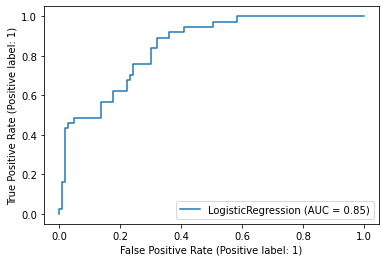

In [14]:
plot_roc_curve(logreg, x_test, y_test)

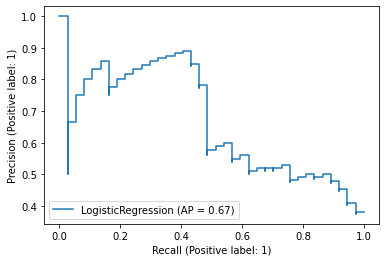

In [15]:
plot_precision_recall_curve(logreg, x_test, y_test)

> ## Simple Hyperparamater Tuning for Logistic Regression

Simple hyperparameter tuning: (optimize C) optimized by f1 and using training 60%, validation 20%, test 20%

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, stratify = y_trainval, test_size = 140, random_state = 20)

In [17]:
hyperparam_c = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
best_score = 0
val_score = []

for i in hyperparam_c:
    # fitting model 
    logreg = LogisticRegression(solver = 'liblinear', C = i)
    logreg.fit(x_train, y_train)
    
    # score calculated
    y_pred_val = logreg.predict(x_val)
    score_tmp = f1_score(y_val, y_pred_val)
    
    # choose best score
    if score_tmp > best_score:
        best_score = score_tmp
        best_param = i

In [18]:
print('Best score :', best_score)
print('Best hyperparam :', best_param)

Best score : 0.676056338028169
Best hyperparam : 0.1


> ## Compare Result

In [19]:
logreg_after = LogisticRegression(solver = 'liblinear', C = 0.1)
logreg_before = LogisticRegression(solver = 'liblinear', C = 1)

In [20]:
logreg_before.fit(x_trainval, y_trainval)
y_pred = logreg_before.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [21]:
logreg_after.fit(x_trainval, y_trainval)
y_pred = logreg_after.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       103
           1       0.72      0.49      0.58        37

    accuracy                           0.81       140
   macro avg       0.78      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



1. Improvement in validation score not significant
2. C score not good enough, solution change C value
3. Test Set coincidentally hard to predict
    
train - val - test : for big data (millions) -> use spark

______
> ## Simple Hyperparamater Tuning for Logistic Regression with Grid Search (Cross Validation)

Grid Search CV hyperparameter tuning: (optimize C and max_iter) optimized by tf1 and using stratified CV 5 fold

In [22]:
hyperparam_c = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'max_iter':[100, 200, 300, 400, 500, 1000]
}

 # C = 1 is our benchmark
skfold = StratifiedKFold(n_splits = 5) # every split have the same default proportion
logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)

grid_search = GridSearchCV(
    logreg, 
    param_grid = hyperparam_c, 
    cv = skfold, 
    scoring = 'f1', 
    n_jobs = -1
)

In [23]:
grid_search.fit(x_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1')

In [24]:
 grid_search.best_params_

{'C': 0.05, 'max_iter': 100}

In [26]:
grid_search.best_score_

0.5563225088777649

In [32]:
hasil_cv = pd.DataFrame(grid_search.cv_results_)

In [35]:
hasil_cv[hasil_cv['rank_test_score'] < 3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
54,0.007386,0.002803,0.029035,0.032853,0.05,100,"{'C': 0.05, 'max_iter': 100}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
55,0.018176,0.014421,0.017424,0.024390,0.05,200,"{'C': 0.05, 'max_iter': 200}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
56,0.019191,0.015057,0.029443,0.041482,0.05,300,"{'C': 0.05, 'max_iter': 300}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
57,0.008788,0.005132,0.004988,0.000631,0.05,400,"{'C': 0.05, 'max_iter': 400}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
58,0.006597,0.001736,0.020811,0.026048,0.05,500,"{'C': 0.05, 'max_iter': 500}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
59,0.006204,0.000409,0.007214,0.004540,0.05,1000,"{'C': 0.05, 'max_iter': 1000}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1


In [40]:
hasil_cv[(hasil_cv['param_C'] == 1)&(hasil_cv['param_max_iter'] == 100)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.011989,0.006321,0.01324,0.015025,1,100,"{'C': 1, 'max_iter': 100}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,55


In [41]:
hasil_cv[(hasil_cv['param_C'] == 0.05)&(hasil_cv['param_max_iter'] == 100)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
54,0.007386,0.002803,0.029035,0.032853,0.05,100,"{'C': 0.05, 'max_iter': 100}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1


> ## Compared Result Before and After

In [36]:
logreg_after = LogisticRegression(solver = 'liblinear', C = 0.05)
logreg_before = LogisticRegression(solver = 'liblinear', C = 1)

In [37]:
# Before
logreg_before.fit(x_trainval, y_trainval)
y_pred = logreg_before.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [38]:
# After
logreg_after.fit(x_trainval, y_trainval)
y_pred = logreg_after.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



1. Improvement in validation score not significant
2. Hyperparam score not good enough, solution change hyperparam value
3. Test Set coincidentally hard to predict (random_state = 2020)